In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
mnist = input_data.read_data_sets('./data/MNIST_data/', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# setting hyperparameters for training
learning_rate = 0.01
training_epoch = 21
batch_size = 256
display_step = 2
examples_to_show = 10

In [4]:
# define network parameters
n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784

In [5]:
# define input data, since it is a unsupervised learning, so only image data is needed
X = tf.placeholder(tf.float32, [None, n_input])

In [6]:
# define weights and biases
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input]))
}

In [7]:
# define autoencoder model
def encoder(x):
    # Encoder hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Eecoder hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    # Decoder hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    # Decoder hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

# construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [8]:
# construct loss and optimizer
y_pred = decoder_op  # predict value
y_true = X  # actual value

cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Epoch: 0001 cost= 0.183883622
Epoch: 0003 cost= 0.131532237
Epoch: 0005 cost= 0.116332859
Epoch: 0007 cost= 0.107455499
Epoch: 0009 cost= 0.106552340
Epoch: 0011 cost= 0.100551441
Epoch: 0013 cost= 0.101577021
Epoch: 0015 cost= 0.096558124
Epoch: 0017 cost= 0.092472836
Epoch: 0019 cost= 0.089261696
Epoch: 0021 cost= 0.083965302
Optimization finished


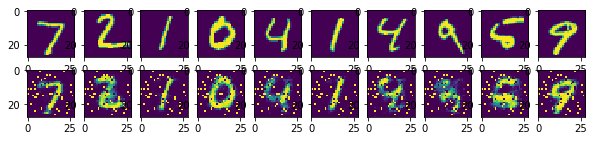

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples / batch_size)
    # start training
    for epoch in range(training_epoch):
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # print loss value each epoch
        if epoch % display_step == 0:
            print('Epoch: %04d' % (epoch + 1), 'cost=', '{:.9f}'.format(c))
    print('Optimization finished')
    # use trained autoencoder on test dataset
    encode_decode = sess.run(y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # compare actual image with reconstructed image
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))  # test dataset
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))  # reconstructed result
    # f.show()
    # plt.draw()
    plt.show()
    # plt.waitforbuttonpress()